In [2]:
import numpy as np
from scipy.signal import resample as res
import matplotlib.pyplot as plt
import pandas as pd


%matplotlib inline

In [15]:
filename = 'sheetdata/United data.xlsx'
sheetname = 'krup_poly'
data = pd.read_excel(filename, sheetname, header=[0, 1, 2])
data.head()

right                                                                \
        hip                    knee                   ankle                 
          x         y app         x         y app         x         y app   
0  0.001042  1.263158 NaN  0.005208  0.285714 NaN  0.004132  0.697674 NaN   
1  0.011458 -0.631579 NaN  0.010417  0.571429 NaN  0.012397  0.348837 NaN   
2  0.019792 -3.157895 NaN  0.016667  1.714286 NaN  0.016529  0.000000 NaN   
3  0.026042 -6.315789 NaN  0.022917  3.428571 NaN  0.020661 -0.697674 NaN   
4  0.033333 -9.157895 NaN  0.028125  5.714286 NaN  0.028926 -1.395349 NaN   

       left                                                                 
        hip                     knee                  ankle                 
          x          y app         x        y app         x          y app  
0  0.005208  17.217391 NaN  0.001042   6.8750 NaN  0.008333  19.811321 NaN  
1  0.015625  17.478261 NaN  0.005208   7.8125 NaN  0.014583  20.867925 NaN  
2  0.026042  18.260870 NaN  0.008333   9.6875 NaN  0.020833  18.754717 NaN  
3  0.031250  17.478261 NaN  0.010417  11.2500 NaN  0.025000  16.377358 NaN  
4  0.036458  15.391304 NaN  0.011458  12.1875 NaN  0.032292  14.792453 NaN

In [16]:
r_hip_df = data['right']['hip']
r_knee_df = data['right']['knee']

In [17]:
r_hip_y = r_hip_df['y'].dropna().values
r_knee_y = r_knee_df['y'].dropna().values

In [25]:
n_points = 400
r_hip_res = res(r_hip_y, n_points)
r_knee_res = res(r_knee_y, n_points)

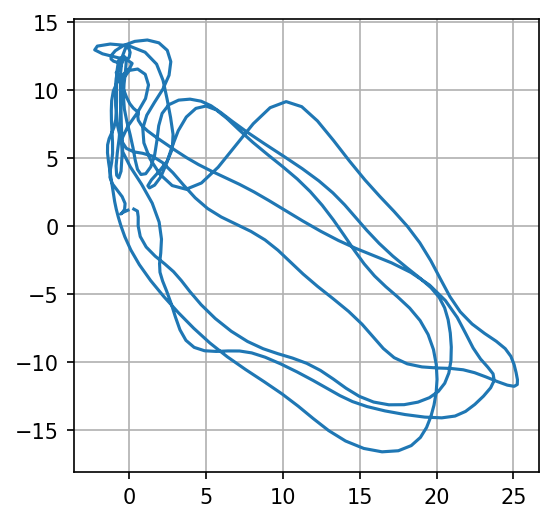

In [46]:
plt.figure(figsize=(4,4), dpi=150)
plt.plot(r_knee_res, r_hip_res)
plt.grid()

In [52]:
l_hip_y = data['left']['hip']['y'].dropna().values
l_knee_y = data['left']['knee']['y'].dropna().values

l_hip_res = res(l_hip_y, n_points)
l_knee_res = res(l_knee_y, n_points)

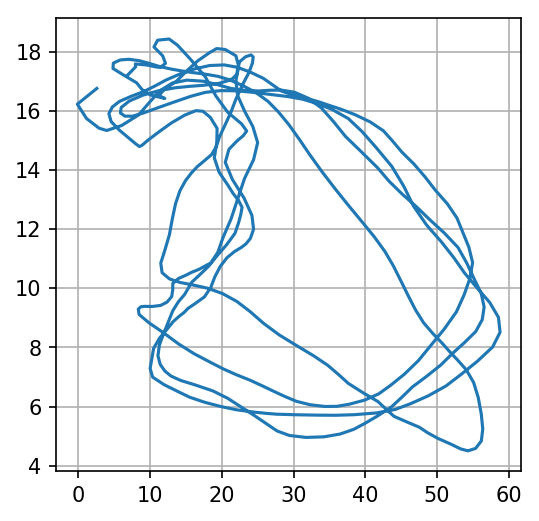

In [54]:
plt.figure(figsize=(4,4), dpi=150)
plt.plot(l_knee_res, l_hip_res)
plt.grid()

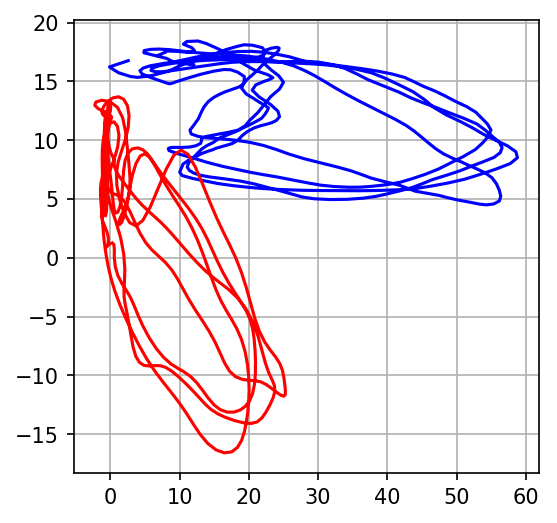

In [56]:
plt.figure(figsize=(4,4), dpi=150)
plt.plot(l_knee_res, l_hip_res, 'b')
plt.plot(r_knee_res, r_hip_res, 'r')
plt.grid()

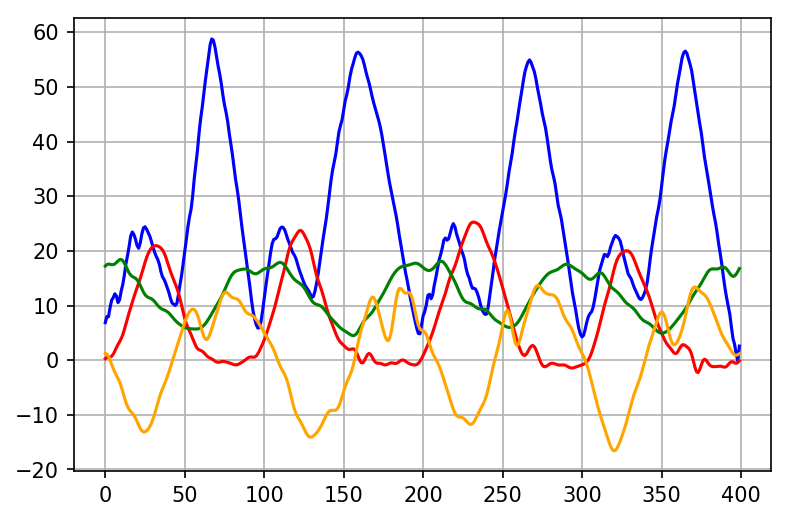

In [60]:
plt.figure(dpi=150)
plt.plot(l_knee_res, 'b', r_knee_res, 'r')
plt.plot(l_hip_res, 'g', r_hip_res, 'orange')
plt.grid()

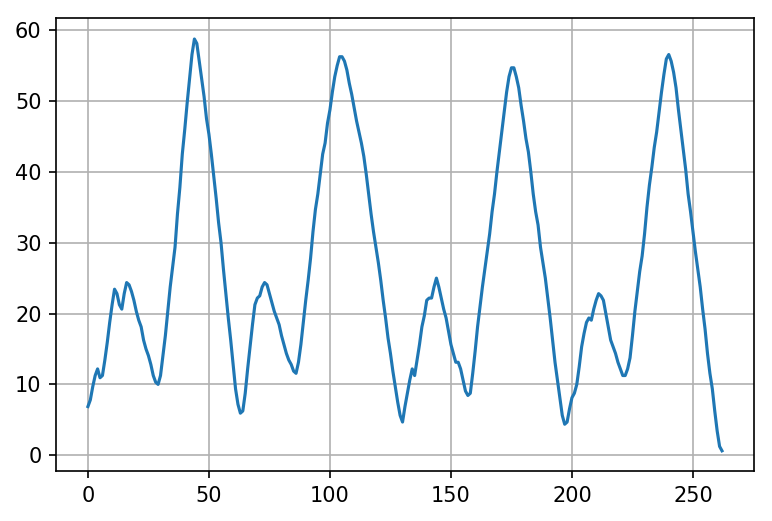

In [62]:
plt.figure(dpi=150)
plt.plot(l_knee_y)
plt.grid()

In [65]:
from scipy.spatial import procrustes as proc

In [69]:
left_m = np.array([r_knee_res, r_hip_res]).T
right_m = np.array([l_knee_res, l_hip_res]).T


print('Lest matrix: ', left_m.shape)
print('Right matrix: ', right_m.shape)

Lest matrix:  (400, 2)
Right matrix:  (400, 2)


In [79]:
right, left, disparity = proc(left_m, right_m)
# РАЗБИТЬ ПРОК РЕЗАЛТ НА НЕСОКЛЬКО ПЕРЕМЕННЫХ, ПОТОМ МАТРИЦЫ С ДВУМЯ НОВЫМИ ФОРМАМИ НАДО БУДЕТ РАЗИТЬ НА ДВА ВЕКТОРА КАЖДУЮ


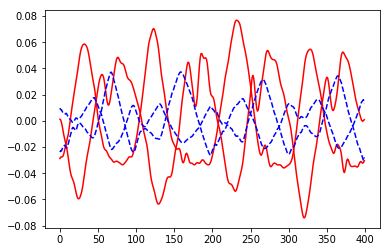

In [82]:
plt.plot(right, 'r', left, '--b')

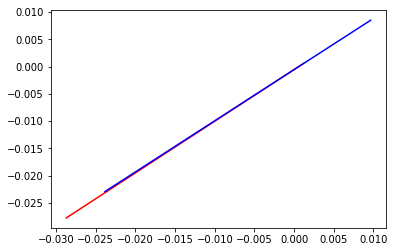

In [81]:
plt.plot(right[0], right[1], 'r', left[0], left[1], 'b')